In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
"/data/additional/nih_chest_xray/images_001/images/00000001_000.png"

'/data/additional/nih_chest_xray/images_001/images/00000001_000.png'

In [3]:
img_path = glob('/data/additional/nih_chest_xray/*/images/*.png')

In [4]:
len(img_path)

112120

In [11]:
df = pd.read_csv('/data/additional/nih_chest_xray/Data_Entry_2017.csv')
df_bbox = pd.read_csv('/data/additional/nih_chest_xray/BBox_List_2017.csv')

In [12]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


<AxesSubplot:>

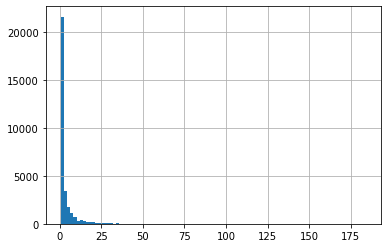

In [8]:
df["Patient ID"].value_counts().hist(bins=100)

In [10]:
df["Patient ID"].value_counts().value_counts()

1      17503
2       4113
3       2100
4       1330
5        938
       ...  
111        1
87         1
102        1
117        1
119        1
Name: Patient ID, Length: 103, dtype: int64

In [13]:
df_bbox

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [14]:
df_bbox["Finding Label"].value_counts()

Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64

In [16]:
df["Finding Labels"].value_counts()

No Finding                                                                      60361
Infiltration                                                                     9547
Atelectasis                                                                      4215
Effusion                                                                         3955
Nodule                                                                           2705
                                                                                ...  
Infiltration|Mass|Pleural_Thickening|Pneumonia                                      1
Consolidation|Effusion|Infiltration|Mass|Nodule|Pleural_Thickening|Pneumonia        1
Consolidation|Pneumonia|Mass                                                        1
Atelectasis|Emphysema|Fibrosis|Nodule|Pleural_Thickening|Pneumothorax               1
Atelectasis|Cardiomegaly|Effusion|Infiltration|Pneumothorax                         1
Name: Finding Labels, Length: 836, dtype: int64

In [17]:
label_list = []

for l in df["Finding Labels"]:
    col_l = l.split('|')
    for each_col in col_l:
        if (each_col in label_list) == False:
            label_list.append(each_col)

In [18]:
label_list

['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'No Finding',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']

In [19]:
len(label_list)

15